In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

import pandas as pd
link = 'https://drive.google.com/open?id=1WK8WZbqvThGM6OUBxtTA7igLjfq4JTNU'
fluff,id = link.split('=')
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('final_dataset.csv')  
dataset = pd.read_csv('final_dataset.csv')


In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
dataset.columns

Index(['Unnamed: 0', 'ArrDel15', 'ArrDelayMinutes', 'ArrTime', 'CRSArrTime',
       'CRSDepTime', 'DayofMonth', 'DepDel15', 'DepDelayMinutes', 'DepTime',
       'Dest', 'DestAirportID', 'FlightDate', 'Month', 'Origin',
       'OriginAirportID', 'Quarter', 'Year', 'CRSDepTimedup', 'CRSArrTimedup',
       'airport_x', 'DewPointF_x', 'windspeedKmph_x', 'precipMM_x',
       'WindGustKmph_x', 'tempF_x', 'WindChillF_x', 'winddirDegree_x',
       'humidity_x', 'time_x', 'cloudcover_x', 'pressure_x', 'airport_y',
       'DewPointF_y', 'windspeedKmph_y', 'precipMM_y', 'WindGustKmph_y',
       'tempF_y', 'WindChillF_y', 'winddirDegree_y', 'humidity_y', 'time_y',
       'cloudcover_y', 'pressure_y', 'FlightData'],
      dtype='object')

In [0]:
dataset.head(3)

,Unnamed: 0,ArrDel15,ArrDelayMinutes,ArrTime,CRSArrTime,CRSDepTime,DayofMonth,DepDel15,DepDelayMinutes,DepTime,Dest,DestAirportID,FlightDate,Month,Origin,OriginAirportID,Quarter,Year,CRSDepTimedup,CRSArrTimedup,airport_x,DewPointF_x,windspeedKmph_x,precipMM_x,WindGustKmph_x,tempF_x,WindChillF_x,winddirDegree_x,humidity_x,time_x,cloudcover_x,pressure_x,airport_y,DewPointF_y,windspeedKmph_y,precipMM_y,WindGustKmph_y,tempF_y,WindChillF_y,winddirDegree_y,humidity_y,time_y,cloudcover_y,pressure_y,FlightData
0,0,0.0,8.0,1610.0,1602,745,1,0.0,0.0,741.0,JFK,12478,2016-01-01,1,SEA,14747,1,2016,700,1600,SEA,23,7,0.0,8,34,29,107,66,700,0,1030,JFK,32,22,0.0,26,41,32,255,74,1600,0,1015,2016-01-01
1,1,0.0,0.0,1540.0,1600,1310,1,0.0,0.0,1306.0,JFK,12478,2016-01-01,1,MIA,13303,1,2016,1300,1600,MIA,73,11,0.0,13,81,79,124,81,1300,65,1020,JFK,32,22,0.0,26,41,32,255,74,1600,0,1015,2016-01-01
2,2,1.0,25.0,1628.0,1603,1330,1,1.0,38.0,1408.0,JFK,12478,2016-01-01,1,MCO,13204,1,2016,1300,1600,MCO,72,8,0.1,10,79,78,227,83,1300,79,1019,JFK,32,22,0.0,26,41,32,255,74,1600,0,1015,2016-01-01


In [0]:
print(dataset["DepDel15"].unique())
print( dataset["ArrDel15"].unique())

[0. 1.]
[0. 1.]


In [0]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1815402 entries, 0 to 1815401
Data columns (total 45 columns):
Unnamed: 0         int64
ArrDel15           float64
ArrDelayMinutes    float64
ArrTime            float64
CRSArrTime         int64
CRSDepTime         int64
DayofMonth         int64
DepDel15           float64
DepDelayMinutes    float64
DepTime            float64
Dest               object
DestAirportID      int64
FlightDate         object
Month              int64
Origin             object
OriginAirportID    int64
Quarter            int64
Year               int64
CRSDepTimedup      int64
CRSArrTimedup      int64
airport_x          object
DewPointF_x        int64
windspeedKmph_x    int64
precipMM_x         float64
WindGustKmph_x     int64
tempF_x            int64
WindChillF_x       int64
winddirDegree_x    int64
humidity_x         int64
time_x             int64
cloudcover_x       int64
pressure_x         int64
airport_y          object
DewPointF_y        int64
windspeedKmph_y   

In [0]:
dataset.isnull().sum()

Unnamed: 0         0
ArrDel15           0
ArrDelayMinutes    0
ArrTime            0
CRSArrTime         0
CRSDepTime         0
DayofMonth         0
DepDel15           0
DepDelayMinutes    0
DepTime            0
Dest               0
DestAirportID      0
FlightDate         0
Month              0
Origin             0
OriginAirportID    0
Quarter            0
Year               0
CRSDepTimedup      0
CRSArrTimedup      0
airport_x          0
DewPointF_x        0
windspeedKmph_x    0
precipMM_x         0
WindGustKmph_x     0
tempF_x            0
WindChillF_x       0
winddirDegree_x    0
humidity_x         0
time_x             0
cloudcover_x       0
pressure_x         0
airport_y          0
DewPointF_y        0
windspeedKmph_y    0
precipMM_y         0
WindGustKmph_y     0
tempF_y            0
WindChillF_y       0
winddirDegree_y    0
humidity_y         0
time_y             0
cloudcover_y       0
pressure_y         0
FlightData         0
dtype: int64

In [0]:
dataset.describe()

,Unnamed: 0,ArrDel15,ArrDelayMinutes,ArrTime,CRSArrTime,CRSDepTime,DayofMonth,DepDel15,DepDelayMinutes,DepTime,DestAirportID,Month,OriginAirportID,Quarter,Year,CRSDepTimedup,CRSArrTimedup,DewPointF_x,windspeedKmph_x,precipMM_x,WindGustKmph_x,tempF_x,WindChillF_x,winddirDegree_x,humidity_x,time_x,cloudcover_x,pressure_x,DewPointF_y,windspeedKmph_y,precipMM_y,WindGustKmph_y,tempF_y,WindChillF_y,winddirDegree_y,humidity_y,time_y,cloudcover_y,pressure_y
count,1.815402e+06,1.815402e+06,1.815402e+06,1.815402e+06,1.815402e+06,1.815402e+06,1.815402e+06,1.815402e+06,1.815402e+06,1.815402e+06,1.815402e+06,1.815402e+06,1.815402e+06,1.815402e+06,1.815402e+06,1.815402e+06,1.815402e+06,1.815402e+06,1.815402e+06,1.815402e+06,1.815402e+06,1.815402e+06,1.815402e+06,1.815402e+06,1.815402e+06,1.815402e+06,1.815402e+06,1.815402e+06,1.815402e+06,1.815402e+06,1.815402e+06,1.815402e+06,1.815402e+06,1.815402e+06,1.815402e+06,1.815402e+06,1.815402e+06,1.815402e+06,1.815402e+06
mean,9.077005e+05,2.089708e-01,1.423145e+01,1.475983e+03,1.490250e+03,1.311217e+03,1.576548e+01,1.999541e-01,1.398039e+01,1.318194e+03,1.273937e+04,6.544028e+00,1.273796e+04,2.515149e+00,2.016494e+03,1.297761e+03,1.476222e+03,4.934883e+01,1.230412e+01,2.550004e-01,1.661847e+01,6.527913e+01,6.387155e+01,1.865898e+02,6.345449e+01,1.297761e+03,4.280918e+01,1.016167e+03,4.946636e+01,1.254871e+01,2.630470e-01,1.688419e+01,6.604434e+01,6.476721e+01,1.885539e+02,6.210286e+01,1.476222e+03,4.168821e+01,1.016012e+03
std,5.240616e+05,4.065736e-01,4.142206e+01,5.528555e+02,5.346214e+02,5.022884e+02,8.790739e+00,3.999657e-01,4.148784e+01,5.166968e+02,1.356408e+03,3.396029e+00,1.354193e+03,1.104474e+00,4.999603e-01,5.026490e+02,5.348307e+02,1.615241e+01,6.508050e+00,9.781591e-01,8.993897e+00,1.715484e+01,1.906687e+01,8.698115e+01,2.245898e+01,5.026490e+02,3.971353e+01,6.315899e+00,1.611148e+01,6.471356e+00,1.004746e+00,9.024077e+00,1.710964e+01,1.893323e+01,8.603603e+01,2.252080e+01,5.348307e+02,3.932329e+01,6.315325e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.039700e+04,1.000000e+00,1.039700e+04,1.000000e+00,2.016000e+03,0.000000e+00,0.000000e+00,-1.500000e+01,0.000000e+00,0.000000e+00,1.000000e+00,-1.000000e+01,-2.500000e+01,0.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,9.840000e+02,-1.500000e+01,0.000000e+00,0.000000e+00,1.000000e+00,-1.000000e+01,-2.500000e+01,0.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,9.810000e+02
25%,4.538502e+05,0.000000e+00,0.000000e+00,1.059000e+03,1.111000e+03,9.000000e+02,8.000000e+00,0.000000e+00,0.000000e+00,9.040000e+02,1.129800e+04,4.000000e+00,1.129800e+04,2.000000e+00,2.016000e+03,9.000000e+02,1.100000e+03,3.800000e+01,7.000000e+00,0.000000e+00,1.000000e+01,5.500000e+01,5.300000e+01,1.200000e+02,4.800000e+01,9.000000e+02,0.000000e+00,1.012000e+03,3.800000e+01,8.000000e+00,0.000000e+00,1.000000e+01,5.600000e+01,5.400000e+01,1.240000e+02,4.700000e+01,1.100000e+03,0.000000e+00,1.012000e+03
50%,9.077005e+05,0.000000e+00,0.000000e+00,1.523000e+03,1.530000e+03,1.305000e+03,1.600000e+01,0.000000e+00,0.000000e+00,1.314000e+03,1.289200e+04,7.000000e+00,1.289200e+04,3.000000e+00,2.016000e+03,1.300000e+03,1.500000e+03,5.100000e+01,1.100000e+01,0.000000e+00,1.500000e+01,6.600000e+01,6.600000e+01,1.950000e+02,6.700000e+01,1.300000e+03,3.500000e+01,1.016000e+03,5.200000e+01,1.200000e+01,0.000000e+00,1.500000e+01,6.700000e+01,6.700000e+01,1.970000e+02,6.600000e+01,1.500000e+03,3.300000e+01,1.016000e+03
75%,1.361551e+06,0.000000e+00,1.000000e+01,1.930000e+03,1.928000e+03,1.725000e+03,2.300000e+01,0.000000e+00,9.000000e+00,1.736000e+03,1.393000e+04,9.000000e+00,1.393000e+04,3.000000e+00,2.017000e+03,1.700000e+03,1.900000e+03,6.200000e+01,1.600000e+01,0.000000e+00,2.100000e+01,7.800000e+01,7.800000e+01,2.540000e+02,8.200000e+01,1.700000e+03,8.500000e+01,1.020000e+03,6.200000e+01,1.600000e+01,1.000000e-01,2.200000e+01,7.800000e+01,7.800000e+01,2.560000e+02,8.100000e+01

In [0]:
print("Departure Delay")
print(dataset.corr()["DepDel15"])
print("Arrival Delay")
print(dataset.corr()["ArrDel15"])

Departure Delay
Unnamed: 0         0.020909
ArrDel15           0.710103
ArrDelayMinutes    0.550553
ArrTime            0.085441
CRSArrTime         0.120761
CRSDepTime         0.157014
DayofMonth        -0.007367
DepDel15           1.000000
DepDelayMinutes    0.608065
DepTime            0.200195
DestAirportID      0.032098
Month             -0.021308
OriginAirportID    0.013545
Quarter           -0.020381
Year               0.005595
CRSDepTimedup      0.156625
CRSArrTimedup      0.120554
DewPointF_x        0.036228
windspeedKmph_x    0.083498
precipMM_x         0.080487
WindGustKmph_x     0.072053
tempF_x            0.039102
WindChillF_x       0.035471
winddirDegree_x    0.021590
humidity_x        -0.010428
time_x             0.156625
cloudcover_x       0.029995
pressure_x        -0.059903
DewPointF_y        0.028888
windspeedKmph_y    0.056844
precipMM_y         0.058439
WindGustKmph_y     0.068727
tempF_y            0.008705
WindChillF_y       0.010448
winddirDegree_y    0.027875
humi

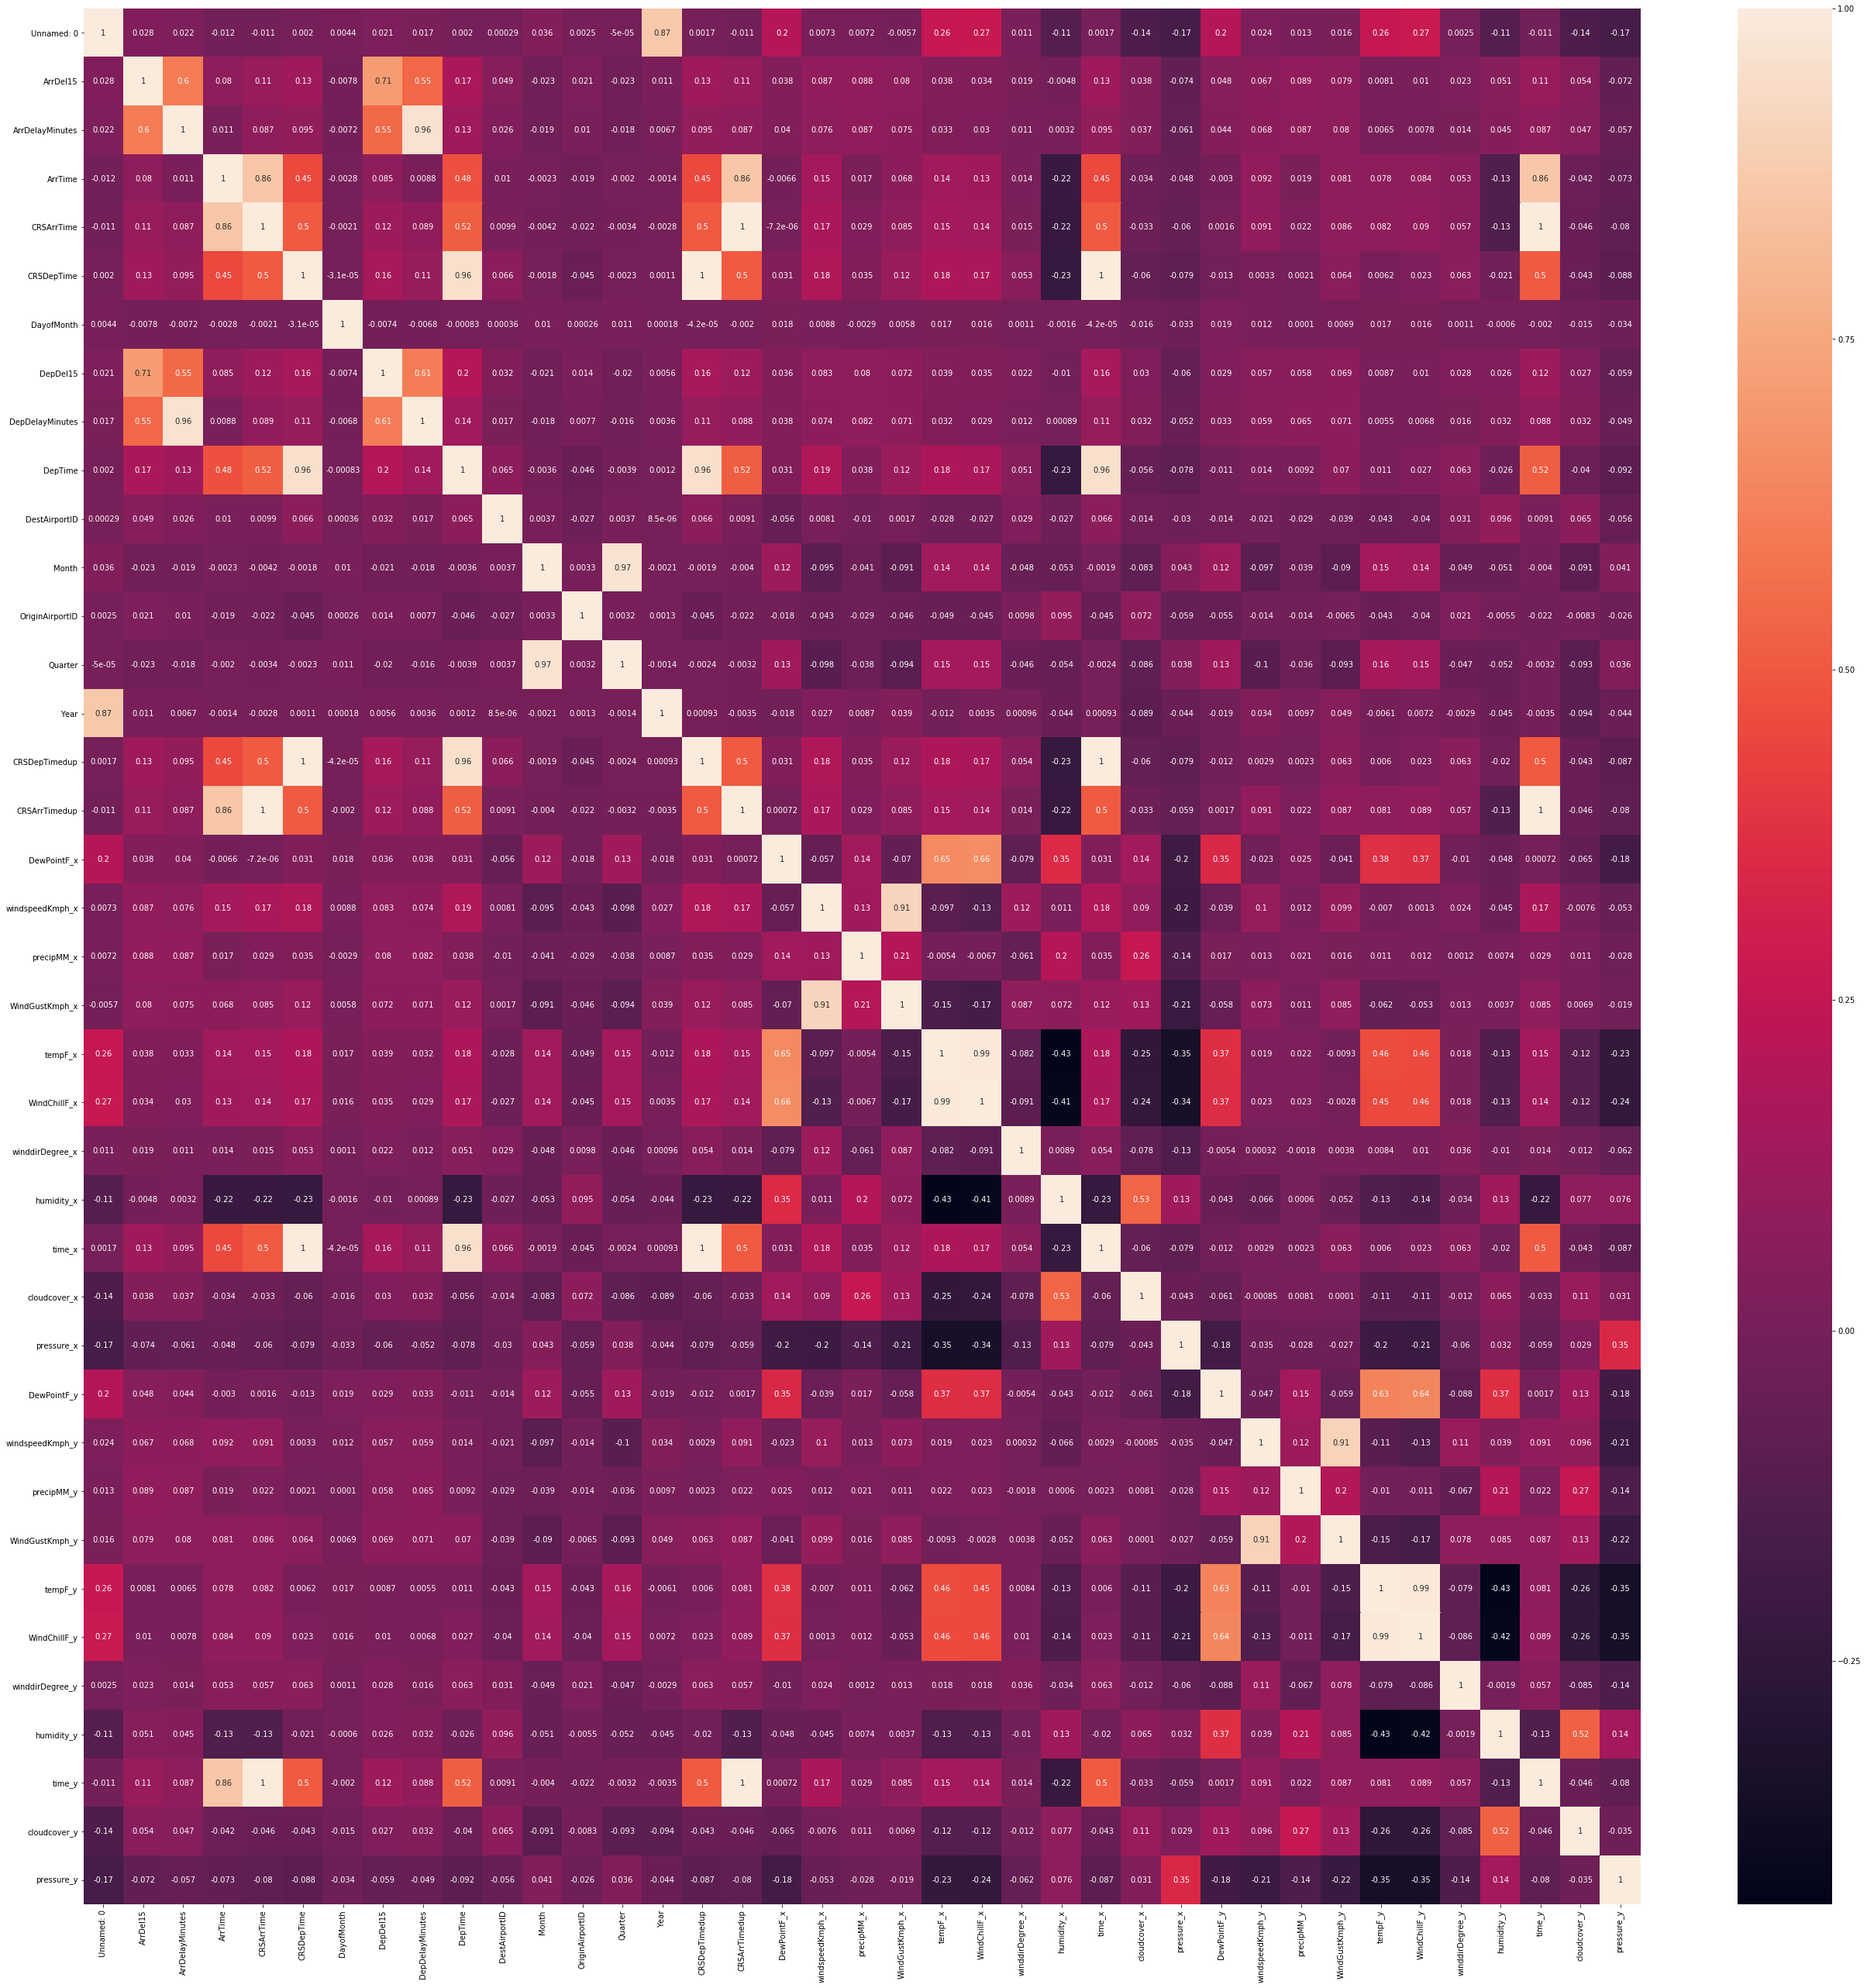

In [0]:
plt.figure(figsize = (45,45))
sns.heatmap(dataset.corr(),annot = True)

In [0]:
X = dataset.iloc[:, [21,22,23,24,25,26,27,28,30,31]]

In [0]:
X

,DewPointF_x,windspeedKmph_x,precipMM_x,WindGustKmph_x,tempF_x,WindChillF_x,winddirDegree_x,humidity_x,cloudcover_x,pressure_x
0,23,7,0.0,8,34,29,107,66,0,1030
1,73,11,0.0,13,81,79,124,81,65,1020
2,72,8,0.1,10,79,78,227,83,79,1019
3,72,8,0.1,10,79,78,227,83,79,1019
4,30,12,0.0,15,51,47,30,46,1,1020
5,22,22,0.0,26,25,13,253,88,100,1024
6,30,12,0.0,15,50,47,29,47,1,1020
7,30,12,0.0,15,50,47,29,47,1,1020
8,32,17,0.0,22,40,32,11,76,100,1035
9,42,7,0.0,9,50,48,235,74,95,1022


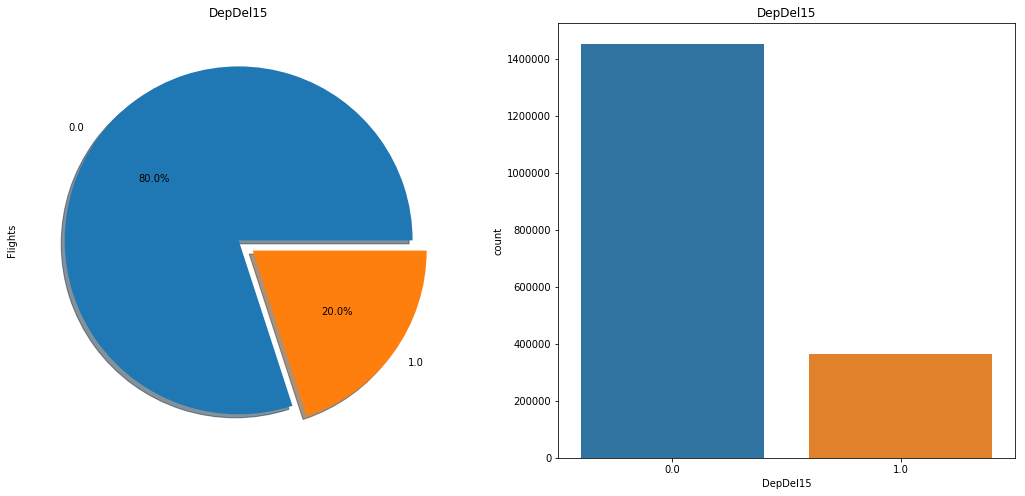

In [0]:
df = dataset
f, ax=plt.subplots(1,2,figsize=(18,8))
df['DepDel15'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('DepDel15')
ax[0].set_ylabel('Flights')
sns.countplot('DepDel15',data=df,ax=ax[1])
ax[1].set_title('DepDel15')
plt.show()